<a href="https://colab.research.google.com/github/Antique-1/deep-running-project/blob/main/dogs_vs_cats_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 이미지 분류 모델을 통한 딥러닝 실습 프로젝트

## 라이브러리 불러오기

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D

## 데이터 로딩 및 전처리

In [ ]:
base_dir = 'C:/project_/train_sorted'

# ImageDataGenerator를 활용한 전처리 및 증강
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 19998 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


## CNN 모델 구성 및 학습

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\kbg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 397ms/step - accuracy: 0.5814 - loss: 0.6667 - val_accuracy: 0.6907 - val_loss: 0.5866
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 387ms/step - accuracy: 0.6835 - loss: 0.5848 - val_accuracy: 0.7195 - val_loss: 0.5532
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 240s 384ms/step - accuracy: 0.7165 - loss: 0.5475 - val_accuracy: 0.7359 - val_loss: 0.5337
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 385ms/step - accuracy: 0.7270 - loss: 0.5294 - val_accuracy: 0.7572 - val_loss: 0.5056
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 387ms/step - accuracy: 0.7528 - loss: 0.5102 - val_accuracy: 0.7632 - val_loss: 0.4919
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 386ms/step - accuracy: 0.7553 - loss: 0.4930 - val_accuracy: 0.7602 - val_loss: 0.4952
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 386ms/step - accuracy: 0.7691 - loss: 0.4768 - val_accuracy: 0.7740 - val_loss: 0.4743
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 240s 384ms/step - accuracy: 0.7714 -

## 학습 결과 시각화

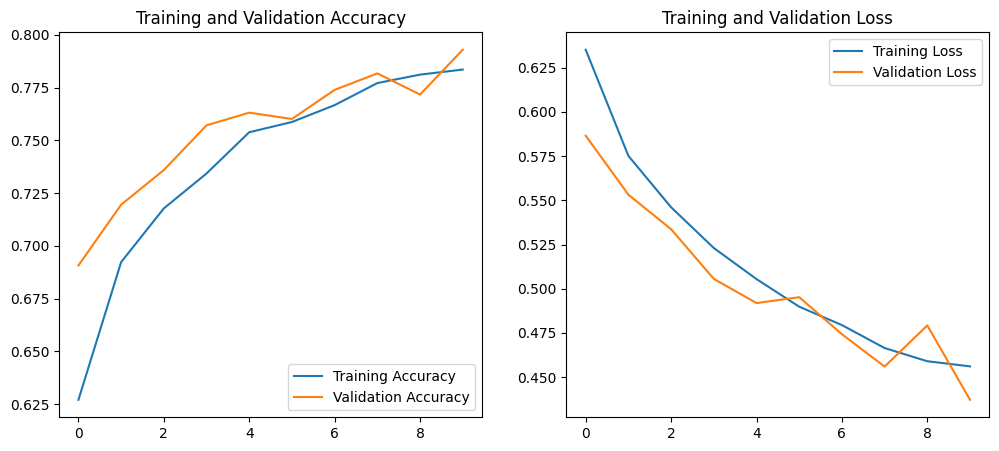

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 예측 결과

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


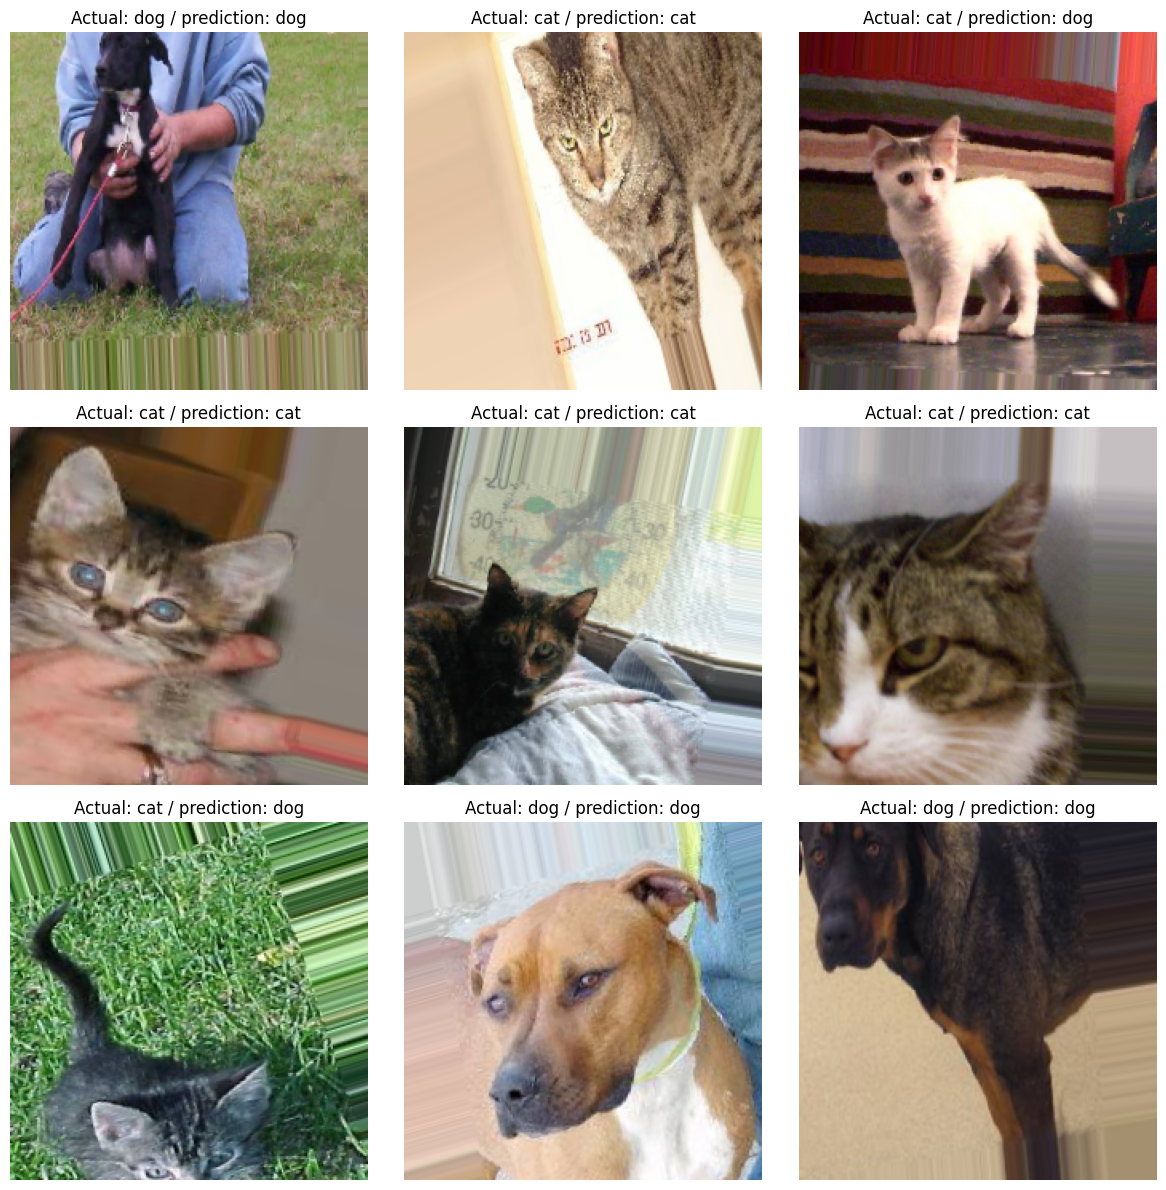

In [ ]:
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

num_images = min(9, sample_images.shape[0])  # 실제 배치 수가 작을 수도 있음

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Actual: {'dog' if sample_labels[i] else 'cat'} / prediction: {'dog' if predictions[i] > 0.5 else 'cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
test_dir = 'C:/project_/test1'  # 테스트 이미지 폴더 경로
img_size = (224, 224)

test_images = sorted(os.listdir(test_dir), key=lambda x: int(x.split('.')[0]))

test_data = []
image_ids = []

for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    test_data.append(img_array)
    image_ids.append(int(img_name.split('.')[0]))

test_data = np.array(test_data)

predictions = model.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int).flatten()

submission_df = pd.DataFrame({
    'id': image_ids,
    'label': predicted_labels
})
submission_df = submission_df.sort_values('id')
submission_df.to_csv('submission.csv', index=False)
print("✅ submission.csv 저장 완료!")

391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step
✅ submission.csv 저장 완료!


## VGG16 모델을 활용한 학습

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))


# 모델 구성
vgg_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# optimizer with gradient clipping
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)

vgg_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 14,977,857 (57.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 학습
vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.8386 - loss: 0.3357 - val_accuracy: 0.9556 - val_loss: 0.1114
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1093s 2s/step - accuracy: 0.9529 - loss: 0.1138 - val_accuracy: 0.9430 - val_loss: 0.1514
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1100s 2s/step - accuracy: 0.9634 - loss: 0.0902 - val_accuracy: 0.9716 - val_loss: 0.0743
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1106s 2s/step - accuracy: 0.9735 - loss: 0.0747 - val_accuracy: 0.9718 - val_loss: 0.0697
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - accuracy: 0.9747 - loss: 0.0635 - val_accuracy: 0.9686 - val_loss: 0.0791


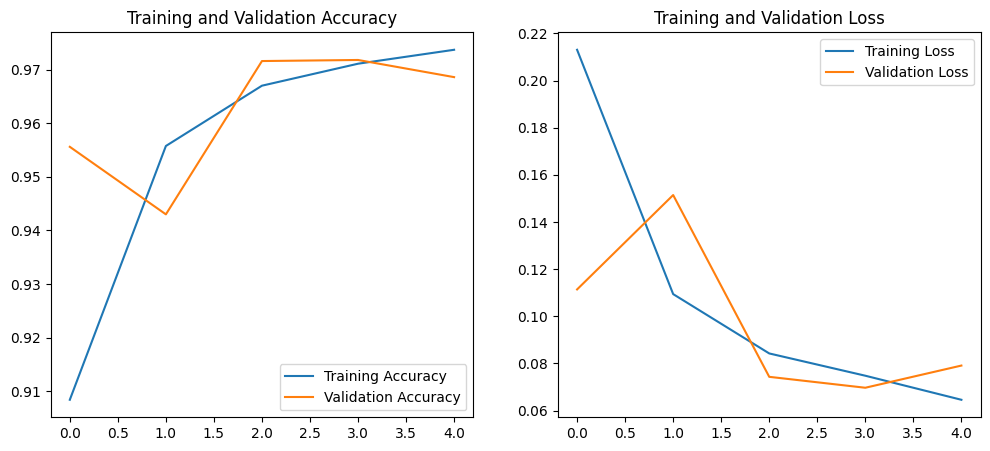

In [ ]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## VCG16모델 예측 결과

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


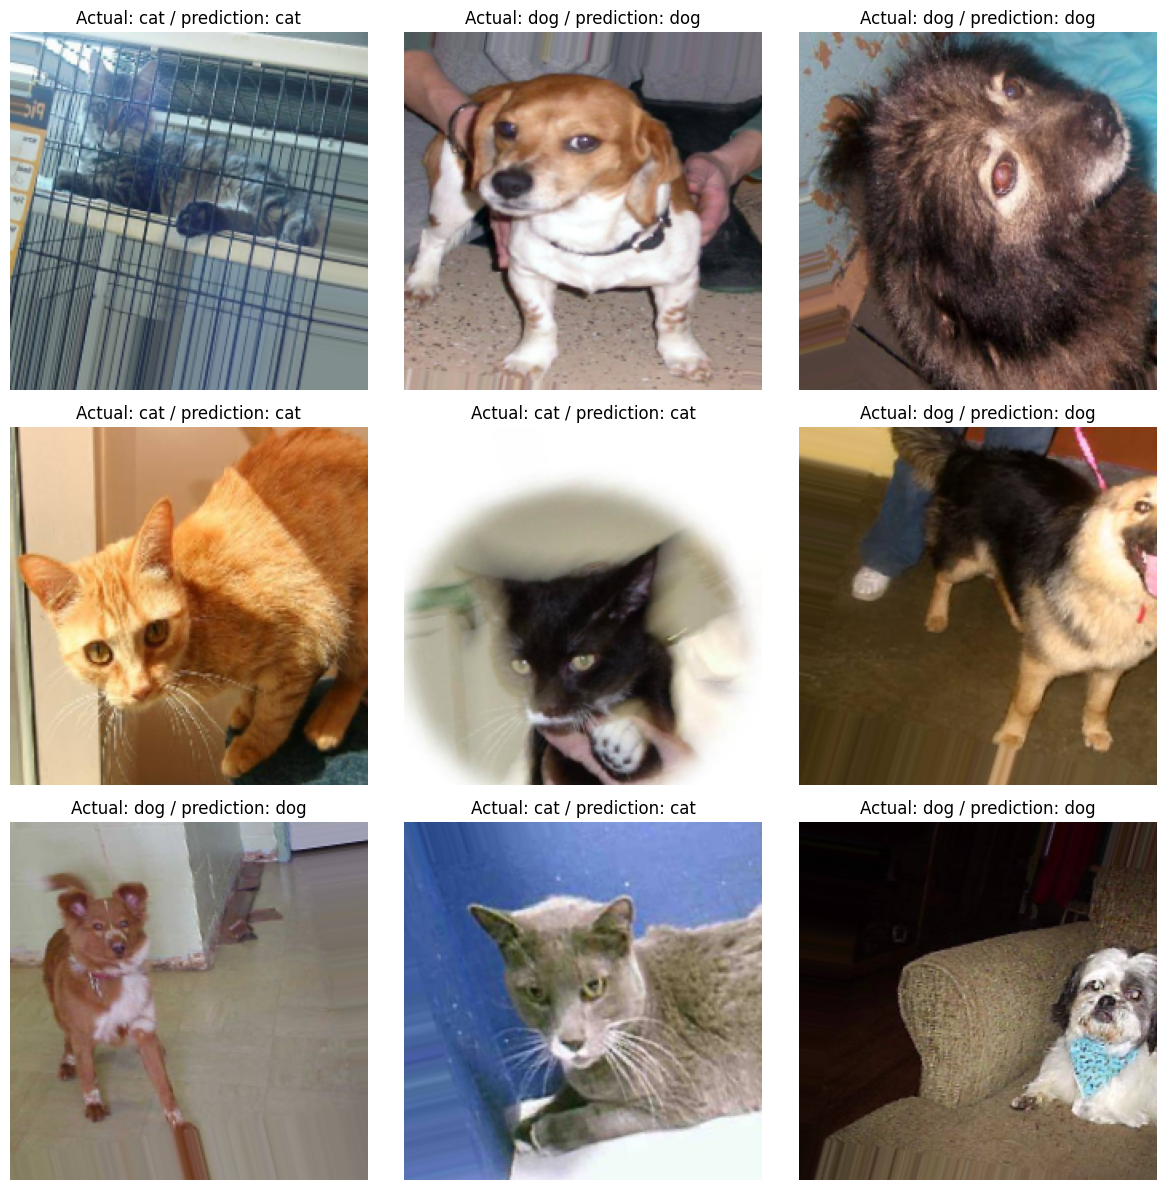

In [ ]:
sample_images, sample_labels = next(val_generator)
predictions = vgg_model.predict(sample_images)

num_images = min(9, sample_images.shape[0])  # 실제 배치 수가 작을 수도 있음

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Actual: {'dog' if sample_labels[i] else 'cat'} / prediction: {'dog' if predictions[i] > 0.5 else 'cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## CNN 모델과 VGG16 모델 성능 비교

In [ ]:
print(f"Custom Model - Final Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"VGG16 Model  - Final Val Accuracy: {vgg_history.history['val_accuracy'][-1]:.4f}")

print(f"Custom Model - Final Val Loss: {history.history['val_loss'][-1]:.4f}")
print(f"VGG16 Model  - Final Val Loss: {vgg_history.history['val_loss'][-1]:.4f}")

# 최고 검증 정확도 비교
print(f"Custom Model - Max Val Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"VGG16 Model  - Max Val Accuracy: {max(vgg_history.history['val_accuracy']):.4f}")

Custom Model - Final Val Accuracy: 0.7930
VGG16 Model  - Final Val Accuracy: 0.9686
Custom Model - Final Val Loss: 0.4372
VGG16 Model  - Final Val Loss: 0.0791
Custom Model - Max Val Accuracy: 0.7930
VGG16 Model  - Max Val Accuracy: 0.9718
